# Quotes classification

In this notebook, we treat each quote of the corpus and assign them a binary score determining if the quote is formal or colloquial according the dictionnary of english contractions to avoid in wikipedia articles

## Packages and functions

In [1]:
#packages
import pandas as pd
from tqdm import tqdm, notebook
notebook.tqdm().pandas()

0it [00:00, ?it/s]

In [2]:
#function to check if strin is contained and update dico
def isinside1(test_string,test_list):
    global dico
    res = [ele for ele in test_list if(ele in test_string)]
    #print(res)
    if res:
        for ele in res:
            i= test_list.index(ele)
            dico["occurences"].loc[i]= dico["occurences"].loc[i]+1
        return 1
    return 0

def isinside2(test_string,test_list):
    if any(ext in test_string for ext in test_list):
        return 1
    return 0

## Dictionnary loading
The dictionnary is compiled in the notebook `contractions_dictionary.ipynb` and is based on the [Wikipedia English contractions list](https://en.wikipedia.org/wiki/Wikipedia:List_of_English_contractions).<br>
A column name "occurences" is created in order to count how much time a word is detected.<br>
A list is made from the dictionary words for comparison

In [3]:
dico= pd.read_pickle("./english_contractions.pkl")
dico["occurences"]=0
dicolist= dico["word"].unique().tolist()

## Quotebank sample loading

In [4]:
df= pd.read_json("../../../Sample_classified_1Mio_v1.json.bz2",compression="bz2",lines=True)

### Quotes formatting for comparison : lowercase and space at the beginning and end
Note that tokenisation has not been used as some of the words or the dictionary consist in several tokens (for exemple, isn't is composed of tokens "is" and "n't"

In [5]:
df_tested_quotes= df["quotation"].progress_apply(lambda x : " "+x.lower()+" ")

  0%|          | 0/668534 [00:00<?, ?it/s]

## Classification using the full dictionary
The dataset quotes are classified a first time using the full dictionary

### Classifying

In [6]:
df["colloquial"]= df_tested_quotes.progress_apply(lambda x : isinside1(x,dicolist))

  0%|          | 0/668534 [00:00<?, ?it/s]

/Users/nicolasantacroce/opt/anaconda3/envs/adaenv/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Quotes statistics

In [7]:
df.describe()

,numOccurrences,p1,p2,delta_p,year,colloquial
count,668534.00000,668534.000000,668534.000000,668534.000000,668534.000000,668534.000000
mean,3.55898,0.818245,0.161096,0.657149,2017.536327,0.383233
std,22.64603,0.095738,0.081709,0.173361,1.770882,0.486175
min,1.00000,0.500100,0.008600,0.300000,2015.000000,0.000000
25%,1.00000,0.747400,0.093400,0.521900,2016.000000,0.000000
50%,1.00000,0.830100,0.152600,0.674900,2018.000000,0.000000
75%,2.00000,0.897300,0.221900,0.802200,2019.000000,1.000000
max,12086.00000,0.990800,0.350000,0.982100,2020.000000,1.000000


About 38.3% of quotes are qualified as colloquial.

### Most common words

In [8]:
dico["occurence_fraction"]= dico["occurences"]/df["colloquial"].count()
dico.sort_values(by='occurence_fraction', ascending=False)[:25]

,word,occurences,occurence_fraction
63,it's,68314,0.102185
19,don't,32580,0.048733
54,i'm,32185,0.048143
102,that's,28226,0.042221
129,we're,26724,0.039974
42,he's,17141,0.025640
107,there's,14634,0.021890
130,we've,14475,0.021652
59,i've,13896,0.020786
17,didn't,12503,0.018702


<AxesSubplot:title={'center':'Word occurences (log-log)'}, xlabel='word rank', ylabel='# of word occurences'>

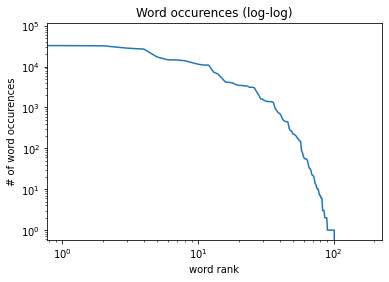

In [9]:
dico.sort_values(by='occurence_fraction', ascending=False).reset_index()["occurences"].plot(
    xlabel="word rank", ylabel= "# of word occurences", title= "Word occurences (log-log)",logy=True, logx=True)

Surprisingly, words use do not seem to follow a zipf law (the line would be straight if it was the case)

## Classification using the reduced dictionary
The dataset quotes are classified again using a dictionary from which the most common words have been removed

### Removal of word that appear in more than a certain fraction of words defined in the thresh variable

In [10]:
tresh= 0.02
dico2= dico[dico["occurence_fraction"]<tresh]
dicolist2= dico2["word"].unique().tolist()

### Classifying

In [11]:
df["colloquial"]= df_tested_quotes.progress_apply(lambda x : isinside2(x.lower(),dicolist2))

  0%|          | 0/668534 [00:00<?, ?it/s]

### Quotes statistics

In [12]:
df.describe()

,numOccurrences,p1,p2,delta_p,year,colloquial
count,668534.00000,668534.000000,668534.000000,668534.000000,668534.000000,668534.000000
mean,3.55898,0.818245,0.161096,0.657149,2017.536327,0.164206
std,22.64603,0.095738,0.081709,0.173361,1.770882,0.370462
min,1.00000,0.500100,0.008600,0.300000,2015.000000,0.000000
25%,1.00000,0.747400,0.093400,0.521900,2016.000000,0.000000
50%,1.00000,0.830100,0.152600,0.674900,2018.000000,0.000000
75%,2.00000,0.897300,0.221900,0.802200,2019.000000,0.000000
max,12086.00000,0.990800,0.350000,0.982100,2020.000000,1.000000


We now have 10.2% of colloquial quotes

## Quotes classification examples

In [13]:
import random
df_formal= df[df["colloquial"]==0].reset_index()
df_colloquial= df[df["colloquial"]==1].reset_index()

print("5 formal quotes sample : ")
for i in random.sample(range(len(df_formal)), 5):
    print("\n")
    print(df_formal["quotation"].loc[i])

print("\n5 colloquial quotes sample : ")
for i in random.sample(range(len(df_colloquial)), 5):
    print("\n")
    print(df_colloquial["quotation"].loc[i])

5 formal quotes sample : 


There's been a lot of shaving of the programs, and what it's also come down to is cutting salaries. That's happened for some and happening for others.


What impressed me the most is the creative mind behind these costumes,


Through hunting and fishing license fees, hunters and fishermen have long been the mainstay of funding for non-game animals. I have no doubt the anglers and hunters across the state will welcome this additional help in securing needed financial assistance.


(I'm) less nervous, (I) had sweaty palm syndrome, but it's gotten a lot better this year,


These results, combined with our previous research, suggest that pain relief and access to palliative care is particularly poor for older patients, those with non-cancer diseases and those who live in the North of England. These inequalities must be challenged.

5 colloquial quotes sample : 


I'm perhaps a bit surprised because the beginning of the season was not so good. My goal wasn't so m

## Larger samples classification

In [14]:
del df
for year in range(2015,2021):
    print("start")
    sample= pd.read_json("../../../large_sample/Sample_{}_wrangled.json.bz2".format(year)
                         ,compression="bz2",lines=True)
    print("opened sample {}".format(year))
    sample_lowercase_quotes= sample["quotation"].progress_apply(lambda x : " "+x.lower()+" ")
    print("lowercased sample")
    sample["colloquial"]= sample_lowercase_quotes.progress_apply(lambda x : isinside2(x.lower(),dicolist2))
    print("classified sample")
    sample.to_json("../../../large_sample/Sample_{}_classified.json.bz2".format(year)
                   ,compression='bz2',lines=True,orient="records")
    print("saved sample")
    del sample

start
opened sample 2019


  0%|          | 0/1660942 [00:00<?, ?it/s]

lowercased sample


  0%|          | 0/1660942 [00:00<?, ?it/s]

classified sample
saved sample
start
opened sample 2020


  0%|          | 0/1623688 [00:00<?, ?it/s]

lowercased sample


  0%|          | 0/1623688 [00:00<?, ?it/s]

classified sample
saved sample
